#                                         Capstone Project 1

###              Predicting Customer Purchase Behaviour Against Different Categories of Products

How can the store increase the number of purchases and revenue in black Friday? Black Friday is great opportunity for both customers and businesses to buy or sell the products. So many businesses provide different type of discounts to increase the number of sold items. This day is an opportunity for the stores to increase the revenue, to acquire new customers and advertise the business to regular customers. So providing the best product categories in order to increase the revenue is important. This is by considering different aspects of customer’s background, for example marital status, number of years of living in the city, the areas that customers are currently living, etc. we divide the products in 3 product categories: Product category 3 is subcategory of product category 2, and product category 2 is subcategory of product category 1. This store interested to know which type has more popularity among customers in black Friday. 

The client is any business who has any offer or sell any product in black Friday. They particularly want to know what type of products have highest popularity among customers, so they can plan ahead for next black Friday. Without these analysis, businesses have to do the purchases randomly for black Friday. But this study gives the opportunity to evaluate the products and do the right purchase. This also helps the business to be successful both in black Friday and in future, because this results to increase the customer satisfaction.

### Data Set

The data used for this project comes from Kaggle website, which provides 550,000 observations about the black Friday in a retail store, it contains different kinds of variables either numerical or categorical. However, it contains missing values. The data is available on Kaggle and includes User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Martial_Status, Product_Category_1, Product_Category_2, Product_Category_3, Purchase. 

Rows:
• The dataset includes 550,000 observations of customer transactions in black Friday. 
Columns:
• User_ID
• Product_ID
• Gender
• Age
• Occupation: Id Occupation of each customer
• City_Category: The type of city (Urban,Suburban,rural)
• Stay_In_Current_City_Years: # of years staying in this city
• Marital_Status
• Product_Category_1
• Product_Category_2
• Product_Category_3
• Purchase: Purchase Amount in Dollars 

## 1) Data Wrangling

In this project, we study customer behaviours of a store in black friday. the data file is provided in kaggle website in csv format: 
https://www.kaggle.com/mehdidag/black-friday

data file includes customer information of around 550,000 observations.the variables are: User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, Product_Category_2, Product_Category_3 and Purchase. 

### Data Cleaning
we added few additional columns: Gender Category (binary values), and Age Category (Integer Values), in "Stay_In_Current_City_Years", we changed "+4" to 4 to be a categorical variable. we droped User_ID and Product_ID, since it probably won't help us. we change the type of Product_Category_2 and Product_Category_3 to int64 as well. 

### Missing Values
we have missing values in "Product_Category_2" and "Product_Category_3" columns. it just means that specific customer haven't bought from that category, so we replace it with zero, which is helpful in modeling stage. 

### Outliers
by using different type of visualizations, we showed that there is no outlier in dataset.

In [1]:
# Import necessory packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
import numpy as np

In [2]:
df = pd.read_csv('C:\\Users\\farad\\Springboard-Career Track\\Capstone Project 1\\BlackFriday.csv')

## 1.a. Data Cleaning

In [4]:
# We check the column names, they all look ok and descriptive. also, I check to make sure there is no extra space in the names.
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
# We can find the missing values by using .info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
# To check the total number of counts in each columns. as stated above, some values are null only in Product_Category_2 and Product_Category_3
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

## 1.b. Missing Values and Continuation of Data Cleaning
We have already found the count of missing values in each column. "Product_Category_2" and "Product_Category_3" columns have missing values. it's very normal. that means some customers haven't bought products 2 and 3. for modeling part, we can fill these Null values by zero.

In [7]:
# Now we fill Null values with zero
df[['Product_Category_2','Product_Category_3']] = df[['Product_Category_2','Product_Category_3']].fillna(0)

In [8]:
# "Stay_In_Current_City_Years" column can change to an integer type. but first, we should take care of "+4" values
df.Stay_In_Current_City_Years.replace("4+",4,inplace=True)

In [9]:
# Drop User_ID and Product_ID columns, since they won't help us in our analysis
#df = df.drop(columns=['User_ID','Product_ID'])

In [10]:
# change the columns to categorical or integer types. this way, data takes less memory as well.
df['Gender'] = df['Gender'].astype('category')
df['Age'] = df['Age'].astype('category')
df['City_Category'] = df['City_Category'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Product_Category_2'] = df['Product_Category_2'].astype('int64')
df['Product_Category_3'] = df['Product_Category_3'].astype('int64')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('int64')

In [11]:
# Now, we add two additional columns. we categorize Gender and Age with numeric values
# Gender
def Gendr_Categry(x):
    if x.Gender == 'F':
        return 1
    else:
        return 0

df['Gender_Category'] = df.apply(Gendr_Categry, axis = 1)
# Age
def Ag_Cat(x):
    if x.Age == '0-17':
        return 0
    if x.Age == '18-25':
        return 1
    if x.Age == '26-35':
        return 2
    if x.Age == '36-45':
        return 3
    if x.Age == '46-50':
        return 4
    if x.Age == '51-55':
        return 5
    else:
        return 6
df['Age_Category'] = df.apply(Ag_Cat, axis = 1)


In [12]:
# By applying info method, we see how clean data looks so far.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 14 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null category
Age                           537577 non-null category
Occupation                    537577 non-null int64
City_Category                 537577 non-null category
Stay_In_Current_City_Years    537577 non-null int64
Marital_Status                537577 non-null category
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null int64
Product_Category_3            537577 non-null int64
Purchase                      537577 non-null int64
Gender_Category               537577 non-null int64
Age_Category                  537577 non-null int64
dtypes: category(4), int64(9), object(1)
memory usage: 43.1+ MB


## 1.c. Outliers Checking
All these figures and numbers show that there is no outlier value in any of those columns. they all look to be in a specific range. all customers spend money in a specific range and bought the products very similar to each other.

In [13]:
# import the file one more time with a new dataframe name to check the outliers (without replacing missing values)
df2 = pd.read_csv('C:\\Users\\farad\\Springboard-Career Track\\Capstone Project 1\\BlackFriday.csv')

In [14]:
# a quick check of .describe() method, doesn't show any outliers. below figures don't show outliers either.
df2[['Product_Category_1','Product_Category_2','Product_Category_3','Purchase']].describe()

,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,537577.000000,370591.000000,164278.000000,537577.000000
mean,5.295546,9.842144,12.669840,9333.859853
std,3.750701,5.087259,4.124341,4981.022133
min,1.000000,2.000000,3.000000,185.000000
25%,1.000000,5.000000,9.000000,5866.000000
50%,5.000000,9.000000,14.000000,8062.000000
75%,8.000000,15.000000,16.000000,12073.000000
max,18.000000,18.000000,18.000000,23961.000000


# 2. Data Visualization
In this part, we study the characteristics of customers. these are included Age, Marital_Status,Gender, Number of Years Living in That City, and the type of city that they are living. that helps to know what type of customers are more excited about black friday and its offers. it will help to focus to advertise in that particular audience.

## 2.a. Age and Gender
This figure shows that male customers have more interest to buy from this store. and specificuly, most customers are in age group 26-35.other information is represented in chart below.

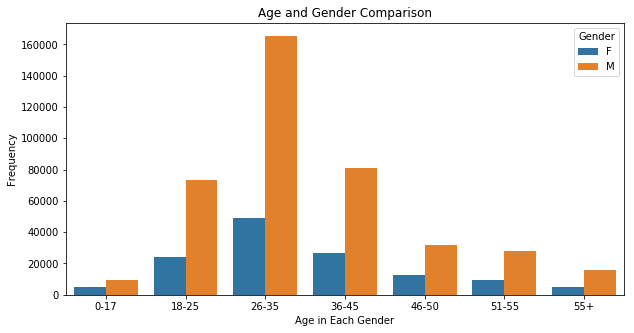

In [15]:
plt.subplots(figsize=(10,5))
sns.countplot(x='Age',hue='Gender', data=df)
plt.title('Age and Gender Comparison')
plt.xlabel('Age in Each Gender')
plt.ylabel('Frequency')
plt.show()

## 2.b. Age and Marital Status
Highest number of cusromers are single and between 26-35 in black friday. looks like this store has more popularity in single males and age group of 26-35. 

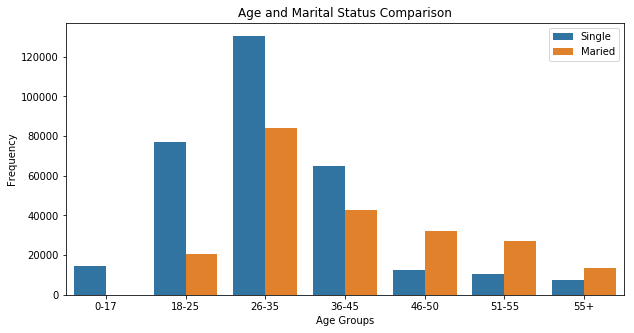

In [16]:
plt.subplots(figsize=(10,5))
sns.countplot(x='Age',hue='Marital_Status', data=df)
# instead of 0 and 1, we call "Single" and "Maried"
L=plt.legend()
L.get_texts()[0].set_text('Single')
L.get_texts()[1].set_text('Maried')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.title('Age and Marital Status Comparison')
plt.show()

## 2.c. Age and Number of Years Living in the City
Now, let's dig in the type of people who live there. this store has most popularity among those who moved to this city in 1 year. the other type of information has been represented in chart below.

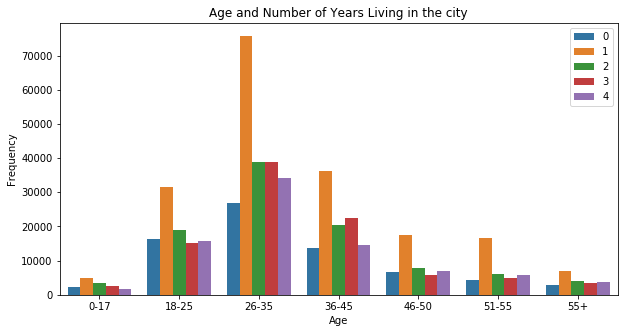

In [17]:
plt.subplots(figsize=(10,5))
ax = sns.countplot(x='Age',hue='Stay_In_Current_City_Years', data=df)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age and Number of Years Living in the city')
# sort both labels and handles by labels
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels)
plt.show()

## 2.d. Age and City Category
As you see below, main customers live in suburban areas of city, second rank is urban areas, and the last group lives in rural areas.

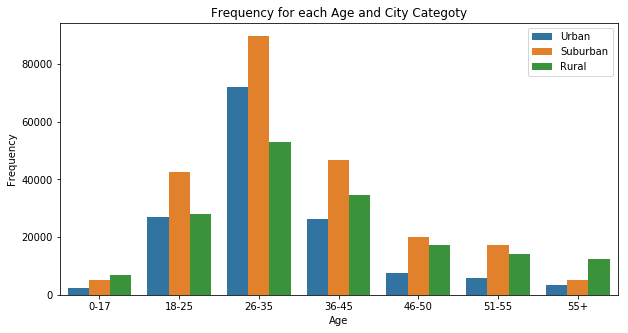

In [18]:
plt.subplots(figsize=(10,5))
sns.countplot(x='Age',hue='City_Category', data=df)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency for each Age and City Categoty')
# Change the labels in legend
L=plt.legend()
L.get_texts()[0].set_text('Urban')
L.get_texts()[1].set_text('Suburban')
L.get_texts()[2].set_text('Rural')
plt.show()

## 2.e. Fractions of Each Factor
In pie charts below, you will see the percentage of each category for each one of these factors.

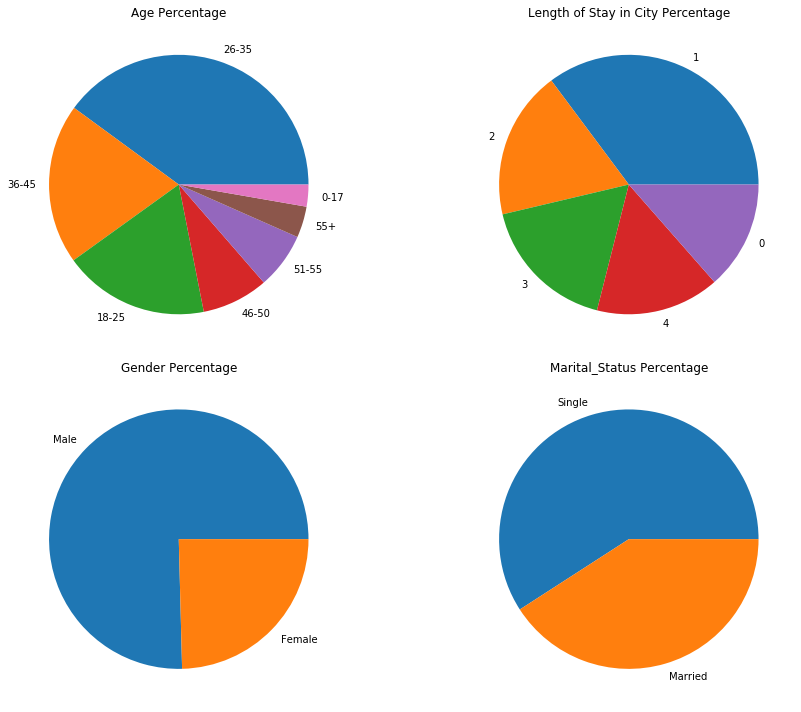

In [19]:
plt.subplots(figsize=(14,10))
plt.subplot(2,2,1)
x = df['Age'].value_counts()
plt.pie(x,labels=x.index) # ['26-35','36-45','18-25','46-50','51-55','55+','0-17']
plt.title('Age Percentage')
plt.subplot(2,2,2)
y = df['Stay_In_Current_City_Years'].value_counts()
plt.pie(y,labels = y.index) # ['1 year', '2 years','3 years','more than 4 years', 'not living in the city']
plt.title('Length of Stay in City Percentage')
plt.subplot(2,2,3)
y = df['Gender'].value_counts()
plt.pie(y,labels = ['Male','Female'])
plt.title('Gender Percentage')
plt.subplot(2,2,4)
y = df['Marital_Status'].value_counts()
plt.pie(y,labels = ['Single','Married'])
plt.title('Marital_Status Percentage')
plt.tight_layout()
plt.show()

## 2.f. Gender-Marital Status Combination in Each Category of Product
Now, we study combination of Age and Gender in each product category. Single male customers have the highest interest to buy in black friday. this conclusion is correct in all three product categories.

In [20]:
def Gen_Mar(x):
    if x.Gender == 'M' and x.Marital_Status == 0:
        return 'Single Male'
    elif x.Gender == 'F' and x.Marital_Status == 0:
        return 'Single Female'
    elif x.Gender == 'M' and x.Marital_Status == 1:
        return 'Married Male'
    elif x.Gender == 'F' and x.Marital_Status == 1:
        return 'Married Female'
df['Gender_MaritalStatus'] = df.apply(Gen_Mar,axis=1)

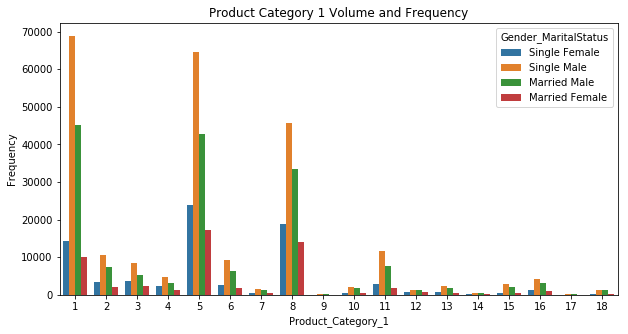

In [21]:
plt.subplots(figsize=(10,5))
sns.countplot(df['Product_Category_1'],hue=df['Gender_MaritalStatus'])
plt.ylabel('Frequency')
plt.title('Product Category 1 Volume and Frequency')
plt.show()

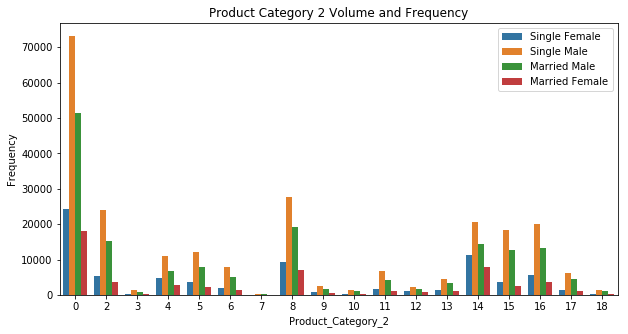

In [22]:
plt.subplots(figsize=(10,5))
sns.countplot(df['Product_Category_2'],hue=df['Gender_MaritalStatus'])
plt.ylabel('Frequency')
plt.title('Product Category 2 Volume and Frequency')
plt.legend(loc='upper right')
plt.show()

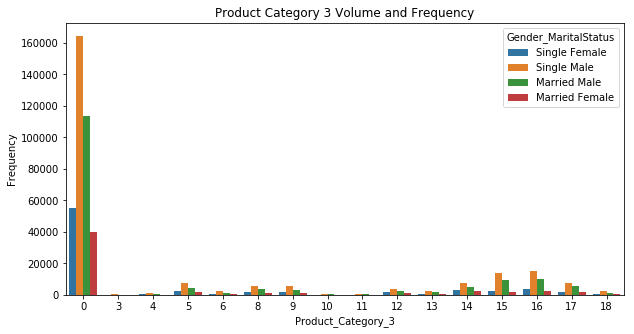

In [23]:
plt.subplots(figsize=(10,5))
sns.countplot(df['Product_Category_3'],hue=df['Gender_MaritalStatus'])
plt.ylabel('Frequency')
plt.title('Product Category 3 Volume and Frequency')
plt.show()

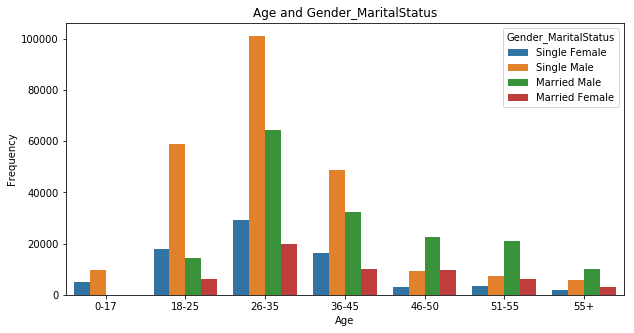

In [24]:
plt.subplots(figsize=(10,5))
sns.countplot(df['Age'],hue=df['Gender_MaritalStatus'])
plt.ylabel('Frequency')
plt.title('Age and Gender_MaritalStatus')
plt.show()

## 2.g. Purchase and Product Categories Comparison
Box plots show the distribution of values in each one the columns. this is another way to check the outliers. having no outliers shows that all customers are in a specific range of wealth. so advertising equally among customers is very important.
The next chart shows the total purchase dollars among different age groups. again, this chart shows that people in age group 26-35 spent more money.
last 4 charts show the histograms of each product category and purchase.

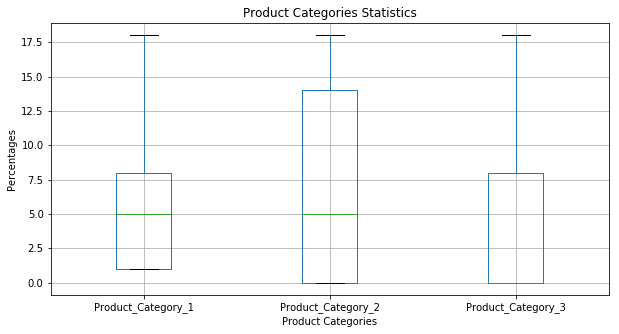

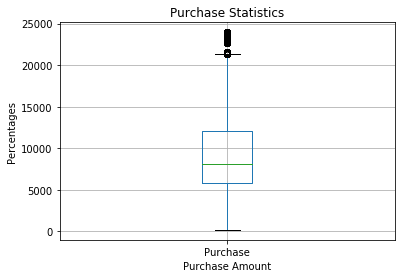

In [25]:
plt.subplots(figsize=(10,5))
df.boxplot(column = ['Product_Category_1','Product_Category_2','Product_Category_3'])
plt.xlabel('Product Categories')
plt.ylabel('Percentages')
plt.ylabel('Percentages')
plt.title('Product Categories Statistics')
plt.show()
df.boxplot(column = ['Purchase'])
plt.xlabel('Purchase Amount')
plt.ylabel('Percentages')
plt.title('Purchase Statistics')
plt.show()          

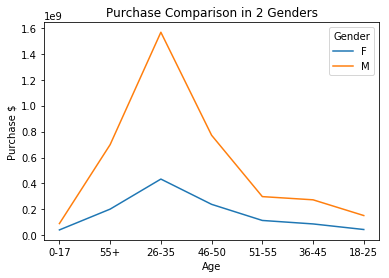

In [26]:
df = pd.read_csv('C:\\Users\\farad\\Springboard-Career Track\\Capstone Project 1\\BlackFriday.csv')
df = df.groupby(['Age','Gender']).Purchase.sum()
df = df.unstack('Gender')
ax = df.plot(title = 'Purchase Comparison in 2 Genders')
group_labels = ['','0-17', '55+', '26-35','46-50', '51-55', '36-45','18-25']
ax.set_xticklabels(group_labels)
plt.ylabel('Purchase $')
plt.show()

C:\Users\farad\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\farad\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


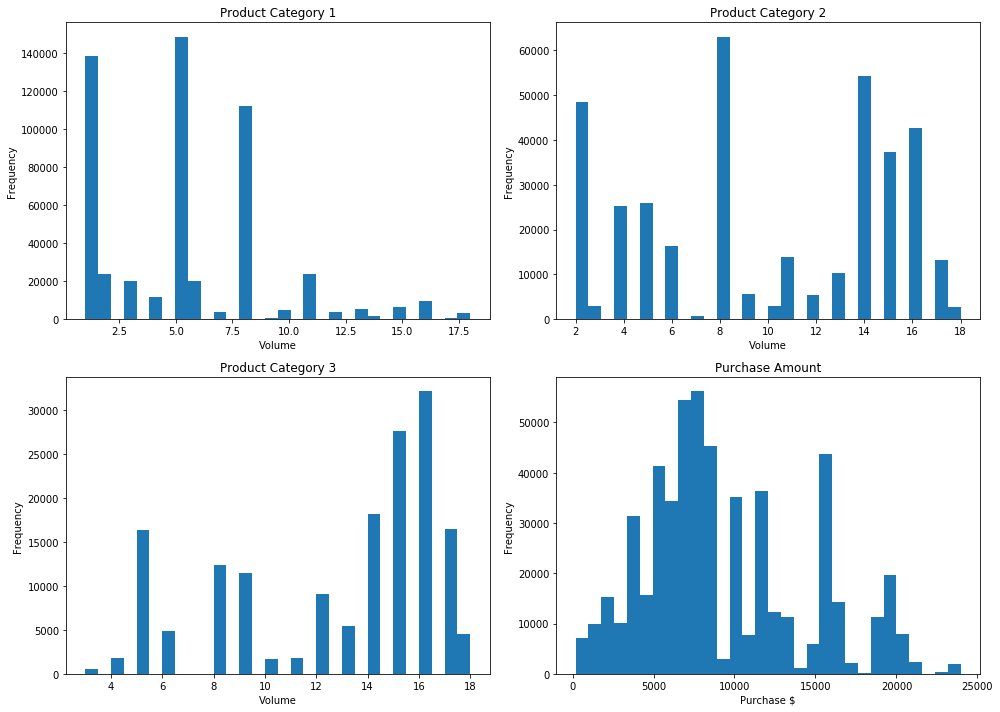

In [27]:
df = pd.read_csv('C:\\Users\\farad\\Springboard-Career Track\\Capstone Project 1\\BlackFriday.csv')
plt.subplots(figsize=(14,10))
plt.subplot(2,2,1)
plt.hist(df['Product_Category_1'],bins = 30)
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Product Category 1')
plt.subplot(2,2,2)
plt.hist(df['Product_Category_2'],bins = 30)
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Product Category 2')
plt.subplot(2,2,3)
plt.hist(df['Product_Category_3'],bins = 30)
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Product Category 3')
plt.subplot(2,2,4)
plt.hist(df['Purchase'],bins = 30)
plt.xlabel('Purchase $')
plt.ylabel('Frequency')
plt.title('Purchase Amount')
plt.tight_layout()
plt.show()

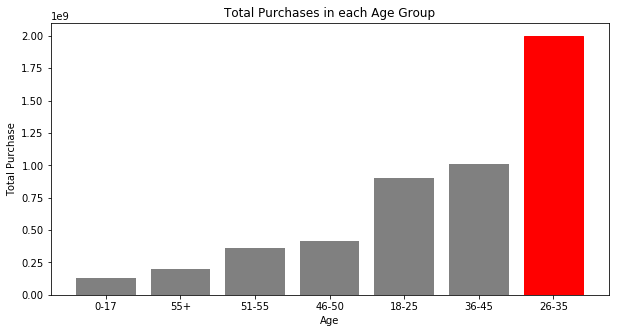

In [28]:
plt.subplots(figsize=(10,5))
age_purchases = df.groupby('Age')['Purchase'].sum().sort_values()
barlist = plt.bar(age_purchases.index,age_purchases, data=df,color='grey')
plt.xlabel('Age')
plt.ylabel('Total Purchase')
plt.title('Total Purchases in each Age Group')
barlist[6].set_color('r')
# for a,b in zip(x, y):
   # plt.text(a, b, str(b))
plt.show()

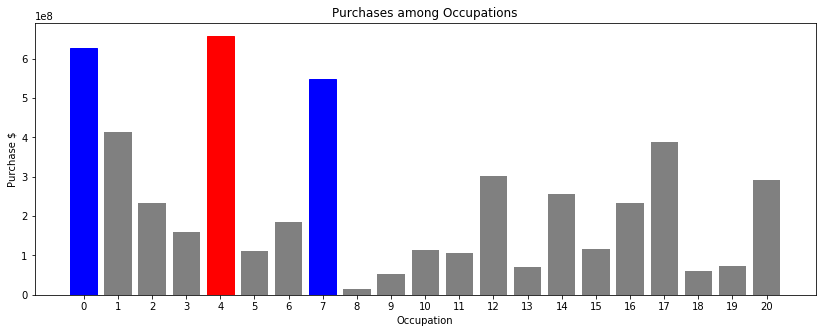

In [29]:
occupation_purchases = df.groupby('Occupation')['Purchase'].sum()
fig,ax = plt.subplots(figsize=(14,5))
barlist = ax.bar(occupation_purchases.index,occupation_purchases,data = df, color='grey')
# this part fixed the issue of x-axis values
ax.set_xticks(np.arange(len(occupation_purchases)))
ax.set_xticklabels(occupation_purchases.index)
# highligh the talest bars
barlist[4].set_color('r')
barlist[0].set_color('b')
barlist[7].set_color('b')
plt.xlabel('Occupation')
plt.ylabel('Purchase $')
plt.title('Purchases among Occupations')
plt.show()

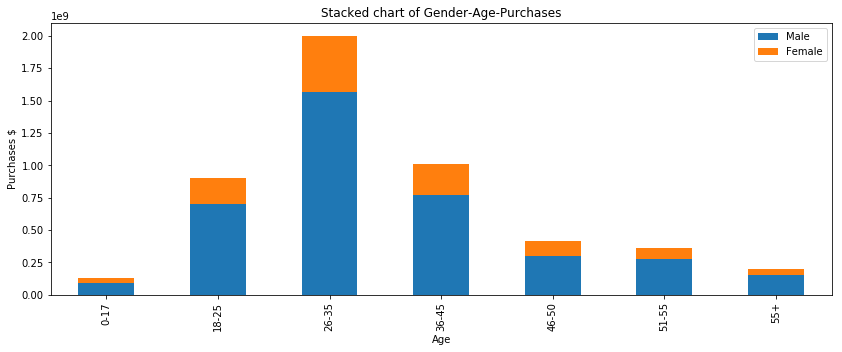

In [30]:
male_purchases_by_age = list(df[['Age','Gender','Purchase']].loc[df.Gender == 'M'].groupby(['Age', 'Gender']).Purchase.sum())
female_purchases_by_age = list(df[['Age','Gender','Purchase']].loc[df.Gender == 'F'].groupby(['Age', 'Gender']).Purchase.sum())
df_structured = pd.DataFrame(index= ['0-17','18-25','26-35','36-45','46-50','51-55','55+'], data={'Male':male_purchases_by_age,
                                                                                   'Female':female_purchases_by_age})

df_structured.plot(kind="bar", stacked=True, figsize=(14,5))
plt.xlabel('Age')
plt.ylabel('Purchases $')
plt.title('Stacked chart of Gender-Age-Purchases')
plt.show()

C:\Users\farad\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


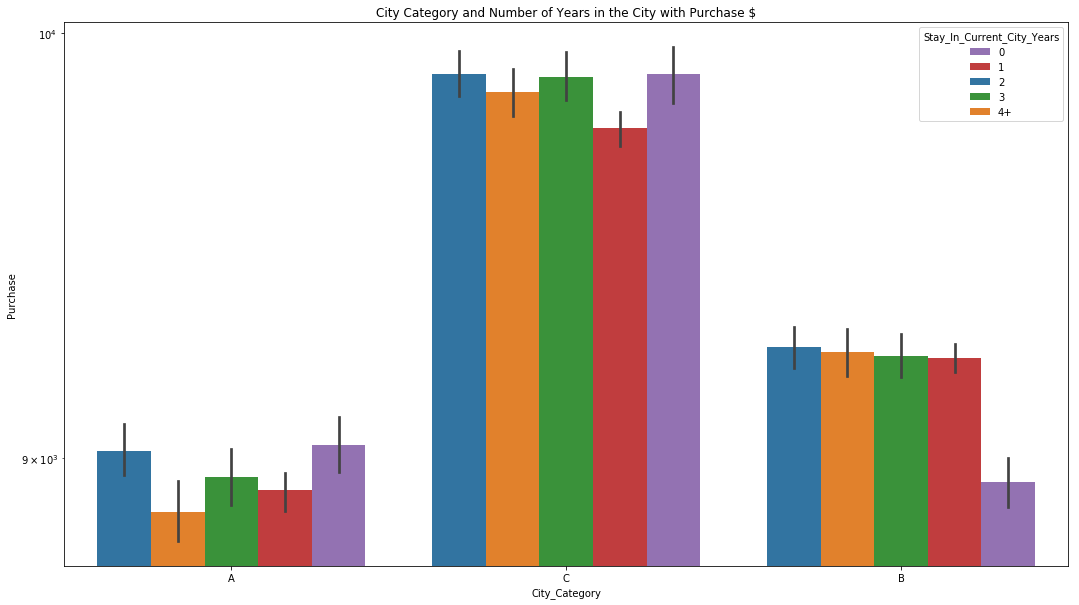

In [31]:
fig,ax = plt.subplots(figsize=(18,10))
ax = sns.barplot(x='City_Category', y='Purchase',hue = 'Stay_In_Current_City_Years', data=df)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, title = 'Stay_In_Current_City_Years')
plt.yscale('log')
plt.title('City Category and Number of Years in the City with Purchase $')
plt.show()

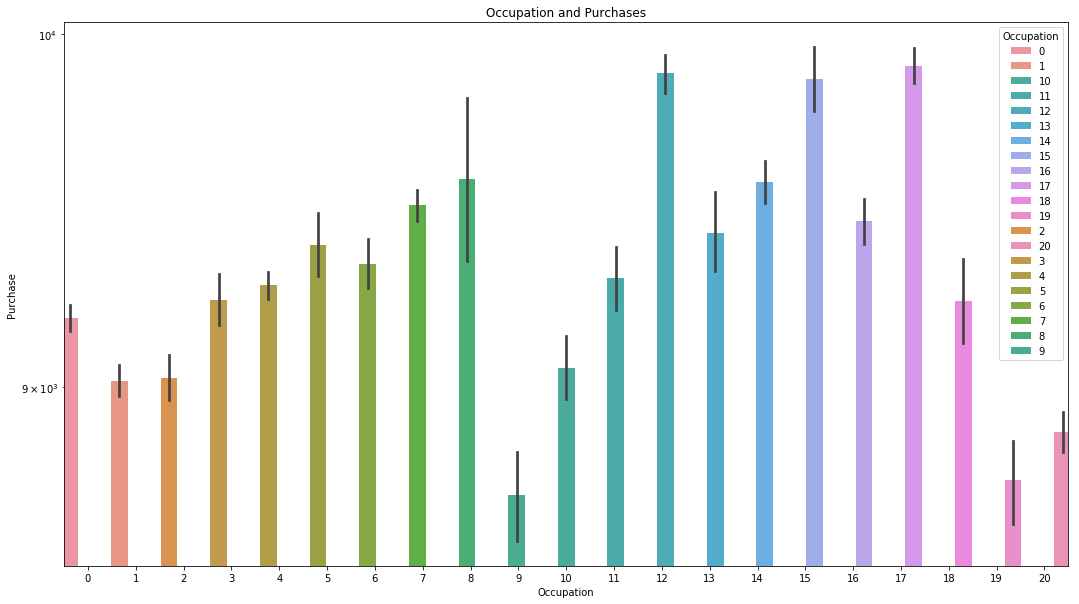

In [32]:
fig,ax = plt.subplots(figsize=(18,10))
ax = sns.barplot(x='Occupation', ax = ax, y='Purchase',hue = 'Occupation', data=df)
# to change the width of the bars bigger
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)

handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, title = 'Occupation', loc= 'upper right')
plt.yscale('log')
plt.title('Occupation and Purchases')
plt.show()

Text(0.5, 1.0, 'Product Category 1 vs. Purchase $')

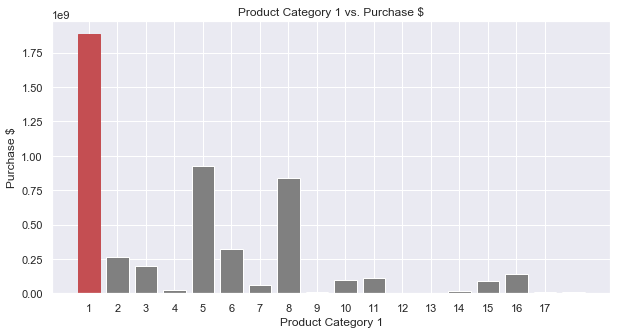

In [33]:
Cat1_Purchases = df.groupby('Product_Category_1').Purchase.sum()
sns.set()
fig,ax = plt.subplots(figsize=(10,5))
barlist = ax.bar(Cat1_Purchases.index,Cat1_Purchases, color = 'grey')
# this part fixed the issue of x-axis values
ax.set_xticks(np.arange(1,len(Cat1_Purchases)))
ax.set_xticklabels(Cat1_Purchases.index)
# we highlight the highest value
barlist[0].set_color('r')
plt.xlabel('Product Category 1')
plt.ylabel('Purchase $')
plt.title('Product Category 1 vs. Purchase $')

Text(0.5, 1.0, 'Product Category 2 vs. Purchase $')

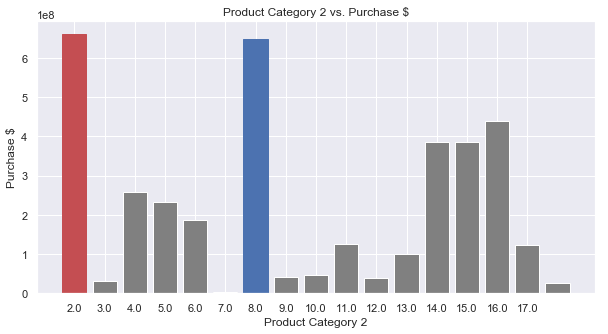

In [34]:
Cat2_Purchases = df.groupby('Product_Category_2').Purchase.sum()
sns.set()
fig,ax = plt.subplots(figsize=(10,5))
barlist = ax.bar(Cat2_Purchases.index,Cat2_Purchases, color = 'grey')
# this part fixed the issue of x-axis values
ax.set_xticks(np.arange(2,len(Cat2_Purchases)+1))
ax.set_xticklabels(Cat2_Purchases.index)
# we highlight the highest value
barlist[0].set_color('r')
barlist[6].set_color('b')
plt.xlabel('Product Category 2')
plt.ylabel('Purchase $')
plt.title('Product Category 2 vs. Purchase $')

Text(0.5, 1.0, 'Product Category 3 vs. Purchase $')

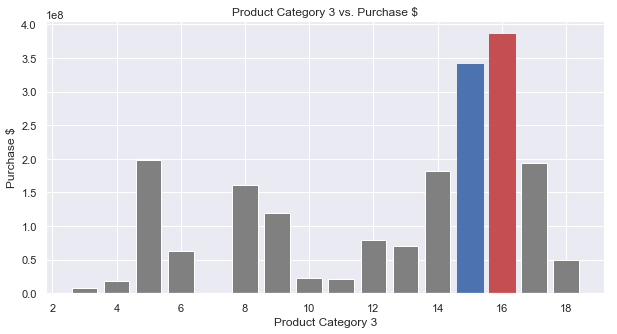

In [35]:
Cat3_Purchases = df.groupby('Product_Category_3').Purchase.sum()
sns.set()
fig,ax = plt.subplots(figsize=(10,5))
barlist = ax.bar(Cat3_Purchases.index,Cat3_Purchases, color = 'grey')
# we highlight the highest value
barlist[12].set_color('r')
barlist[11].set_color('b')
plt.xlabel('Product Category 3')
plt.ylabel('Purchase $')
plt.title('Product Category 3 vs. Purchase $')

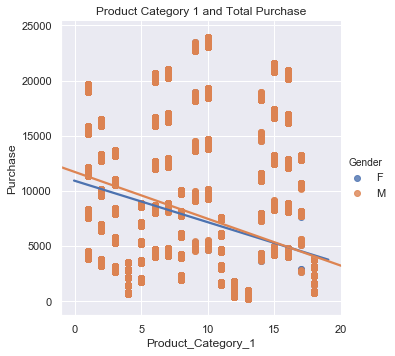

In [36]:
sns.lmplot(x='Product_Category_1', y= 'Purchase', data=df, hue='Gender')
plt.title('Product Category 1 and Total Purchase')
plt.show()

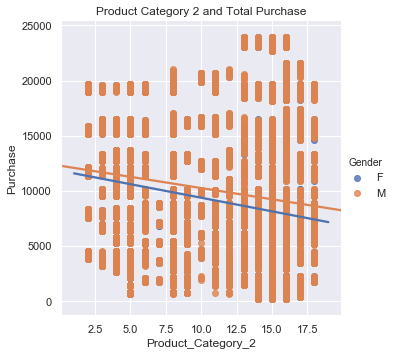

In [37]:
sns.lmplot(x='Product_Category_2', y= 'Purchase', data=df, hue='Gender')
plt.title('Product Category 2 and Total Purchase')
plt.show()

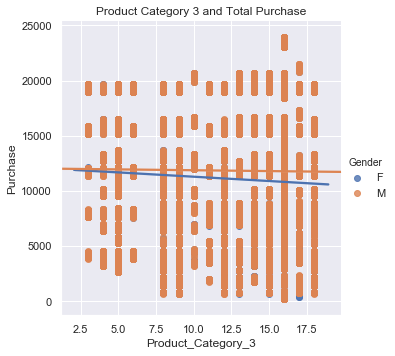

In [38]:
sns.lmplot(x='Product_Category_3', y= 'Purchase', data=df, hue='Gender')
plt.title('Product Category 3 and Total Purchase')
plt.show()

### Data Visualization Conclusions
1) Age group 26-35 years old have more interest to buy from this store.

2) In general, male customers are more than female customers.

3) Singles do more purchases compared to married ones.

4) Those who lived in the suburban area, do more purchases. in the next years, customers don't come back to store. that's something that owner can think more about that, and try to acquire old customers. Age group 26-35 customers within first year buy do highest number of purchases.

5) Most of the customers live in suburban areas. owner can provide some items that urban and rural customers are interested too.

6) Male customers include 75% of total customers.

7) Single Male customers dramatically buy the highest number of products in all 3 product categories. Majaority of them, buy only very few of each product categories.

8) Single men in age group of 26-35 have bought the maximum number of products. also in terms of dollar amount spent, this category of customer spent more than other age group.

9) only purchase dollars values are close to normal distribution. other columns are not showing any particular distribution.

10) Total purchase amount is maximized in age group 26-35.

11) Occupation ID "4" has the highest amount of purchases, followed by number 0 and 7.

12) Rural areas customers spent highest amount of money. please compare this with number 4. people of suburban areas buy the maximum number of products, but people in rural areas paid more.

13) People mostly buy one time from product category 1. 2 and 8 purchases are highest for product category 2. and they buy 16 items of product category 3.

# 3. Statistical Inference
In this section, we perfrom statistical analysis, we study the distribution of dataset and correlation of the data.Hypothesis testing can give us insight about each group of customers.Purchase column is the only continous variable, so we studied its distribution. it's close to normal distribution, but the below figure and test rejects that the purchase data is normal distribution. looking back the hisograms shows that only data that close to normal distribution is purchase values. the other columns don't look nomral.

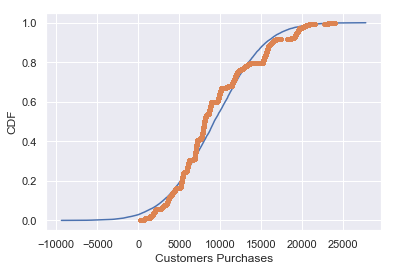

In [39]:
# studying data distribution by using the graph
mean_temp = np.mean(df['Purchase'])
std_temp = np.std(df['Purchase'])
samples_tmp = np.random.normal(mean_temp,std_temp,size=10000)
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y
x,y =ecdf(df['Purchase'])
x_theor,y_theor = ecdf(samples_tmp)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
_ = plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker = '.', linestyle = 'none')
_ = plt.xlabel('Customers Purchases')
_ = plt.ylabel('CDF')
plt.show()

In [40]:
# Using D'Agostino and Pearson's Test for normality test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
data = df['Purchase']
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=33564.582, p=0.000
Sample does not look Gaussian (reject H0)


Now let's answer some of the questions:
## 3.a) Do customers in a specific city category significantly pay more in the store?
Since we have 3 groups (instead of 2 groups), 2 sample t test or 2 sample z test are not useful for testing the averages. instead, we should use one way ANOVA method.

In [41]:
Urban_Area = df['Purchase'].loc[df.City_Category == 'A']
Suburban_Area = df['Purchase'].loc[df.City_Category == 'B']
Rural_Area = df['Purchase'].loc[df.City_Category == 'C']
from scipy import stats
 
F, p = stats.f_oneway(Urban_Area, Suburban_Area, Rural_Area)
F, p

(1376.6587765751206, 0.0)

Results above show that the mean in at least one city category is higher than the other one. we perform turkey test to find that pair.

In [42]:
# Turkey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df['Purchase'],df['City_Category'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper   reject
-----------------------------------------------
  A      B    240.6468 201.4538 279.8399  True 
  A      C    886.4308 844.5732 928.2885  True 
  B      C    645.784  608.1905 683.3775  True 
-----------------------------------------------
['A' 'B' 'C']


In [43]:
Urban_Avg = np.mean(Urban_Area)
Suburban_Avg = np.mean(Suburban_Area)
Rural_Avg = np.mean(Rural_Area)
(Urban_Avg,Suburban_Avg,Rural_Avg)

(8958.011013703177, 9198.657848145418, 9844.44185501604)

Results above show that each category has significant differnece with the other two categories.
with that said, customers in city category C spend more money compared to city category B and B spend more money compared to A.

## 3.b) Does an age group/gender pay more in black Friday?

In [44]:
# age groups
from scipy import stats
F, p = stats.f_oneway(df['Purchase'].loc[df.Age == '0-17'],df['Purchase'].loc[df.Age == '18-25'],df['Purchase'].loc[df.Age == '26-35'],df['Purchase'].loc[df.Age == '36-45'],df['Purchase'].loc[df.Age == '46-50'],df['Purchase'].loc[df.Age == '51-55'],df['Purchase'].loc[df.Age == '55+'])
F,p

(43.48718107271441, 1.9552104879020313e-53)

In [45]:
# Turkey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df['Purchase'],df['Age'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2  meandiff   lower    upper   reject
-------------------------------------------------
 0-17  18-25   215.0707  85.2053  344.936   True 
 0-17  26-35   294.4621  169.3173 419.6068  True 
 0-17  36-45   381.3519  252.269  510.4348  True 
 0-17  46-50   264.7454  125.1087 404.3821  True 
 0-17  51-55   600.4897  457.7051 743.2744  True 
 0-17   55+    433.7717  275.7538 591.7896  True 
18-25  26-35   79.3914   22.7175  136.0653  True 
18-25  36-45   166.2812  101.3727 231.1897  True 
18-25  46-50   49.6747   -34.2845 133.6339 False 
18-25  51-55   385.419   296.3226 474.5155  True 
18-25   55+    218.701   106.8065 330.5955  True 
26-35  36-45   86.8898   32.0325  141.747   True 
26-35  46-50   -29.7167 -106.1715 46.7381  False 
26-35  51-55   306.0276  223.9644 388.0909  True 
26-35   55+    139.3096  32.9302  245.6891  True 
36-45  46-50  -116.6065 -199.3502 -33.8627  True 
36-45  51-55   219.1379  131.1858 307.0899  True 

As seen above, most of the age groups have significant mean compare to other age groups.

Since we have just 2 genders in dataset (Male, Female), we can use 2 sample Z test (since the sample size is more than 30)

In [46]:
# Gender
from statsmodels.stats import weightstats as stests
import numpy as np
ztest ,pval = stests.ztest(x1=df['Purchase'].loc[df.Gender == 'M'], x2=df['Purchase'].loc[df.Gender == 'F'], value=0,alternative='two-sided')
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


In [47]:
np.mean(df['Purchase'].loc[df.Gender == 'M']),np.mean(df['Purchase'].loc[df.Gender == 'F'])

(9504.771712960679, 8809.761348593387)

The amount of purchases among men is significantly higher than women.

## 3.c) Does Marital Status have influence on purchases during black Friday?

In [48]:
from statsmodels.stats import weightstats as stests
import numpy as np
ztest ,pval = stests.ztest(x1=df['Purchase'].loc[df.Marital_Status == 0], x2=df['Purchase'].loc[df.Marital_Status == 1], value=0,alternative='two-sided')
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.9246361475576921
accept null hypothesis


So single and married customers pay almost same in black friday.

## 3.d) Are any of the above significantly more interested to any product category?

In [49]:
# First we make a new column that sums up the product categories of each record. values are 1,2 or 3
df = pd.read_csv('C:\\Users\\farad\\Springboard-Career Track\\Capstone Project 1\\BlackFriday.csv')
df[['Product_Category_2','Product_Category_3']] = df[['Product_Category_2','Product_Category_3']].fillna(0)
def prod_cat_comb(x):
    Prod_Categories = int()
    if x.Product_Category_1 != 0:
        Prod_Categories += 1
    if x.Product_Category_2 != 0:
        Prod_Categories += 1
    if x.Product_Category_3 != 0:
        Prod_Categories += 1
    return Prod_Categories
df['product_categories'] = df.apply(prod_cat_comb,axis=1)

In [50]:
# age groups vs. product categories
# if the value of new column is 1, that customer just purchased product_category_1, if 2, that customer purchased both product categories 1 and 2, and if it is 3, the customer purchased from all categories.
from scipy import stats
F, p = stats.f_oneway(df['product_categories'].loc[df.Age == '0-17'],df['product_categories'].loc[df.Age == '18-25'],df['product_categories'].loc[df.Age == '26-35'],df['product_categories'].loc[df.Age == '36-45'],df['product_categories'].loc[df.Age == '46-50'],df['product_categories'].loc[df.Age == '51-55'],df['product_categories'].loc[df.Age == '55+'])
F,p

(43.084547141646496, 6.419658801054938e-53)

We have significant results of each age group to buy each product category. so we perform the turkey test.

In [51]:
# Turkey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df['product_categories'],df['Age'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 0-17  18-25  -0.0218  -0.0423 -0.0013  True 
 0-17  26-35  -0.0421  -0.0618 -0.0223  True 
 0-17  36-45  -0.0426  -0.0629 -0.0222  True 
 0-17  46-50  -0.0586  -0.0806 -0.0366  True 
 0-17  51-55  -0.0625   -0.085  -0.04   True 
 0-17   55+   -0.0979  -0.1228  -0.073  True 
18-25  26-35  -0.0203  -0.0292 -0.0113  True 
18-25  36-45  -0.0208   -0.031 -0.0106  True 
18-25  46-50  -0.0368   -0.05  -0.0236  True 
18-25  51-55  -0.0407  -0.0547 -0.0266  True 
18-25   55+   -0.0761  -0.0938 -0.0585  True 
26-35  36-45  -0.0005  -0.0092  0.0081 False 
26-35  46-50  -0.0165  -0.0286 -0.0045  True 
26-35  51-55  -0.0204  -0.0333 -0.0075  True 
26-35   55+   -0.0559  -0.0726 -0.0391  True 
36-45  46-50   -0.016  -0.0291  -0.003  True 
36-45  51-55  -0.0199  -0.0337  -0.006  True 
36-45   55+   -0.0553  -0.0728 -0.0378  True 
46-50  51-55  -0.0039  -0.020

In [52]:
# Example:
# in the first row, results is -0.0218
np.mean(df['product_categories'].loc[df.Age == '0-17']), np.mean(df['product_categories'].loc[df.Age == '18-25'])
# since we reject H0, and 0-17 average is higher, that means age group 0-17 has more interest to both categories 1 and 2.

(2.0372611681512205, 2.015476166089682)

In [53]:
# gender vs. product category 1
from statsmodels.stats import weightstats as stests
import numpy as np
ztest ,pval = stests.ztest(x1=df['Product_Category_1'].loc[df.Gender == 'M'], x2=df['Product_Category_1'].loc[df.Gender == 'F'], value=0,alternative='two-sided')
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

3.109644958900916e-246
reject null hypothesis


In [54]:
np.mean(df['Product_Category_1'].loc[df.Gender == 'M']),np.mean(df['Product_Category_1'].loc[df.Gender == 'F'])

(5.197747792194978, 5.595444677261965)

Women are signicantly more interested in product category 1

In [55]:
# gender vs. product category 2
from statsmodels.stats import weightstats as stests
import numpy as np
ztest ,pval = stests.ztest(x1=df['Product_Category_2'].loc[df.Gender == 'M'], x2=df['Product_Category_2'].loc[df.Gender == 'F'], value=0,alternative='two-sided')
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.2467507222882599
accept null hypothesis


In product category 2, both men and women have same interests.

In [56]:
# gender vs. product category 3
from statsmodels.stats import weightstats as stests
import numpy as np
ztest ,pval = stests.ztest(x1=df['Product_Category_3'].loc[df.Gender == 'M'], x2=df['Product_Category_3'].loc[df.Gender == 'F'], value=0,alternative='two-sided')
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

3.7461875368876264e-152
reject null hypothesis


In [57]:
np.mean(df['Product_Category_3'].loc[df.Gender == 'M']),np.mean(df['Product_Category_3'].loc[df.Gender == 'F'])

(3.9999185948986136, 3.478815706861729)

Men are signifantly more interested in product category 3.

In [58]:
# Marital Status vs. Product Category 1
from statsmodels.stats import weightstats as stests
import numpy as np
ztest ,pval = stests.ztest(x1=df['Product_Category_1'].loc[df.Marital_Status == 0], x2=df['Product_Category_1'].loc[df.Marital_Status == 1], value=0,alternative='two-sided')
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

2.6572086419296102e-51
reject null hypothesis


In [59]:
np.mean(df['Product_Category_1'].loc[df.Marital_Status == 0]),np.mean(df['Product_Category_1'].loc[df.Marital_Status == 1])

(5.231466535773731, 5.388218966144885)

Singles are significantly more interested in product category 1.

In [60]:
# Marital Status vs. Product Category 2
from statsmodels.stats import weightstats as stests
import numpy as np
ztest ,pval = stests.ztest(x1=df['Product_Category_2'].loc[df.Marital_Status == 0], x2=df['Product_Category_2'].loc[df.Marital_Status == 1], value=0,alternative='two-sided')
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.4008867986414234
accept null hypothesis


Both singles and married customers have same interest to product category 2.

In [61]:
# Marital Status vs. Product Category 3
from statsmodels.stats import weightstats as stests
import numpy as np
ztest ,pval = stests.ztest(x1=df['Product_Category_3'].loc[df.Marital_Status == 0], x2=df['Product_Category_3'].loc[df.Marital_Status == 1], value=0,alternative='two-sided')
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0013774916683619383
reject null hypothesis


In [62]:
np.mean(df['Product_Category_3'].loc[df.Marital_Status == 0]),np.mean(df['Product_Category_3'].loc[df.Marital_Status == 1])

(3.8945084750029104, 3.8388924281033856)

Again, singles are signicantly more interested in product category 3.

## 3.e) Does any product category encourage customers to spend more money?

In [63]:
from scipy import stats
F, p = stats.f_oneway(df['Purchase'].loc[df.Product_Category_1 > 0],df['Purchase'].loc[df.Product_Category_2 > 0],df['Purchase'].loc[df.Product_Category_3 > 0])
F,p

(13438.766989103835, 0.0)

based on the result, we will reject at least one pair of averages, so we should perform the turkey test.

In [64]:
# Turkey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df['Purchase'],df['product_categories'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2  meandiff   lower     upper   reject
--------------------------------------------------
  1      2    1110.7764 1074.4135 1147.1393  True 
  1      3    3965.1473 3926.7598 4003.5349  True 
  2      3    2854.3709 2817.8428 2890.8991  True 
--------------------------------------------------
[1 2 3]


In [65]:
np.mean(df['Purchase'].loc[df.Product_Category_1 > 0]),np.mean(df['Purchase'].loc[df.Product_Category_2 > 0]), np.mean(df['Purchase'].loc[df.Product_Category_3 > 0])

(9333.859852635065, 10071.934947151982, 11661.001686166133)

Again 1 means just product category 1, 2 means product categories 1 and 2, and 3 means all product categories. based on the results, product category 3 has the highest impact on total purchases. and all 3 product categories have a high impact on sale.

### Statistical Inference Conclusions
1) None of the columns contain values that match with normal distribution. since the sample size is large, we can still perform statistical testings.

2) People from rural areas pay significantly higher campared to people in other areas. next people in subarbun areas pay more than people who live in city.

3) People in age group 26-35 significantly paid highest comapred to other age group. complete results have been provided.
4) Men signifantly paid more than women.

5) Results don't show significant results between single and married people. however, purchases were more among singles based on data visiualization section, but this difference was not significant in this sample.

6) People of different age groups have the same interests to buy varaiety of product categories, and this difference is significantly higher in some age groups.

7) Women are signicantly more interested in product category 1

8) In product category 2, both men and women have same interests.

9) Men are signifantly more interested in product category 3.

10) Singles are significantly more interested in product category 1.

11) Both singles and married customers have same interest to product category 2.

12) Again, singles are signicantly more interested in product category 3.

13) based on the results, product category 3 has the highest impact on total purchases. and all 3 product categories have impact on sale.

# 4) Machine Learning Methods

In [66]:
import warnings; warnings.simplefilter('ignore')

In [67]:
# First, we need to convert few columns to numeric values and drop other non numeric columns
# So, we add two additional columns. we categorize Gender and Age with numeric values
df = pd.read_csv('C:\\Users\\farad\\Springboard-Career Track\\Capstone Project 1\\BlackFriday.csv')
# Gender
def Gendr_Categry(x):
    if x.Gender == 'F':
        return 1
    else:
        return 0

df['Gender_Category'] = df.apply(Gendr_Categry, axis = 1)
# Age
def Ag_Cat(x):
    if x.Age == '0-17':
        return 0
    if x.Age == '18-25':
        return 1
    if x.Age == '26-35':
        return 2
    if x.Age == '36-45':
        return 3
    if x.Age == '46-50':
        return 4
    if x.Age == '51-55':
        return 5
    else:
        return 6

# City Category
def City_Cat(x):
    if x.City_Category == 'A':
        return 1
    if x.City_Category == 'B':
        return 2
    if x.City_Category == 'C':
        return 3
df['City_Category_Numeric'] = df.apply(City_Cat, axis = 1)    
df['Age_Category'] = df.apply(Ag_Cat, axis = 1)
df.Stay_In_Current_City_Years.replace("4+",4,inplace=True)
df = df.drop(columns=['User_ID','Product_ID','Age','Gender','City_Category'])
df[['Product_Category_2','Product_Category_3']] = df[['Product_Category_2','Product_Category_3']].fillna(0)

## 4.a) Linear Regression

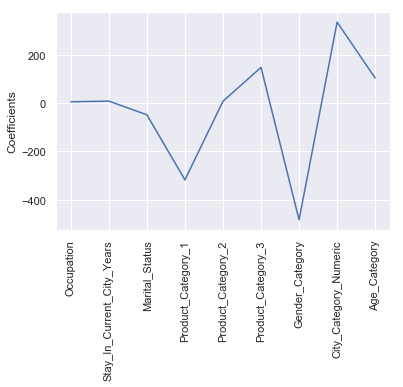

In [68]:
# Lasso Technique for Feature Selection
X = df.drop('Purchase', axis=1).values
y = df['Purchase'].values
from sklearn.linear_model import Lasso
names = df.drop('Purchase',axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=90)
_ = plt.ylabel('Coefficients')
plt.show()

In [69]:
# We use another way for feature selection
# I use the previous figure to determine the parameters to fit the model. then by using p-value, I can determine the best features.
import statsmodels.api as sm
from statsmodels.formula.api import ols
o = ols('Purchase ~ Marital_Status + Product_Category_1 + Product_Category_3 + Gender_Category + City_Category_Numeric + Age_Category',df).fit()
print(o.summary())

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                 1.400e+04
Date:                Fri, 17 May 2019   Prob (F-statistic):               0.00
Time:                        11:18:25   Log-Likelihood:            -5.3004e+06
No. Observations:              537577   AIC:                         1.060e+07
Df Residuals:                  537570   BIC:                         1.060e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              9622.32

#### All the features that we found in the figure have very small p-value (= 0), and so, we select all of them.
#### the signifant parameters are: Marital_Status, Product_Category_1, Product_Category_3, Gender_Category, City_Category_Numeric, Age_Category

In [70]:
# Now, we can use the linear regression.
# Use all 9 predictors to fit linear regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, df.Purchase)
print('Estimated intercept coefficient: {}'.format(lm.intercept_))
pd.DataFrame({'features': names, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

Estimated intercept coefficient: 9515.251259074777


,features,estimatedCoefficients
0,Occupation,5.852796
1,Stay_In_Current_City_Years,8.696786
2,Marital_Status,-48.464818
3,Product_Category_1,-317.834778
4,Product_Category_2,8.214962
5,Product_Category_3,148.437340
6,Gender_Category,-483.965135
7,City_Category_Numeric,336.279466
8,Age_Category,104.383333


Text(0.5, 1.0, 'Relationship between Predicted and Actual Purchase')

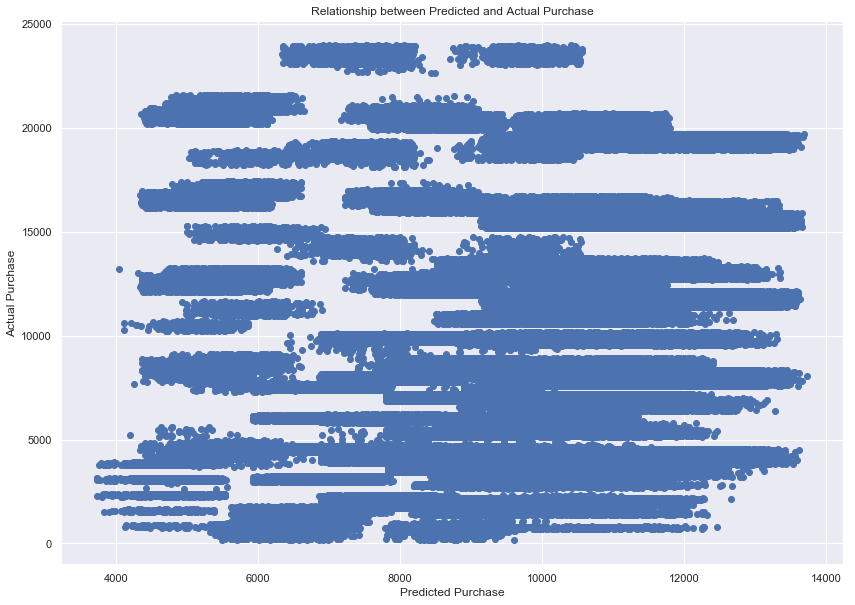

In [71]:
# Let's compare actual and predicted purchases
plt.subplots(figsize=(14,10))
plt.scatter(lm.predict(X), df.Purchase)
plt.xlabel("Predicted Purchase")
plt.ylabel("Actual Purchase")
plt.title("Relationship between Predicted and Actual Purchase")

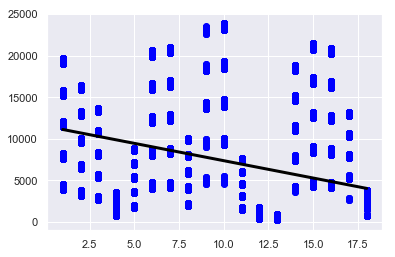

In [72]:
# Product Category 1 vs. Purchase
import numpy as np
y.reshape(-1, 1)
product1 = X[:,3].reshape(-1, 1)
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(product1, y)
prediction_space = np.linspace(min(product1),max(product1)).reshape(-1, 1)
plt.scatter(product1, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()
# In General, Linear Regression can't give a good prediction.

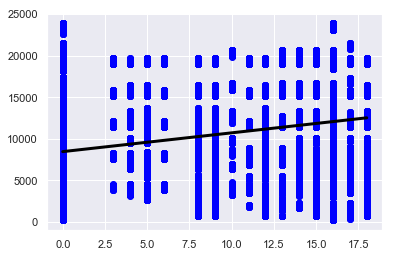

In [73]:
# Product Category 3 vs. Purchase
import numpy as np
y.reshape(-1, 1)
product3 = X[:,5].reshape(-1, 1)
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(product3, y)
prediction_space = np.linspace(min(product3),max(product3)).reshape(-1, 1)
plt.scatter(product3, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()
# In General, Linear Regression can't give a good prediction.

In [74]:
# Linear Regression Errors (in train and test samples)
X = df.drop('Purchase', axis=1).values
y = df['Purchase'].values
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
print('Training Score:',reg_all.score(X_train, y_train))
print('Test Score:',reg_all.score(X_test, y_test))
from sklearn import metrics 
from sklearn import metrics 
print('Root Mean Squared Error-Train:', np.sqrt(metrics.mean_squared_error(y_train, reg_all.predict(X_train))))
print('Root Mean Squared Error-Test:', np.sqrt(metrics.mean_squared_error(y_test, reg_all.predict(X_test))))

Training Score: 0.13573725391775504
Test Score: 0.1343447587859392
Root Mean Squared Error-Train: 4630.888272246797
Root Mean Squared Error-Test: 4633.779057766685


## 4.b) K-means Clustering

In [75]:
# Clustering Age (Kmeans)
X = df.drop('Age_Category', axis=1)
y = df['Age_Category']
from sklearn.cluster import KMeans
model = KMeans(n_clusters=7)
labels = model.fit(X)
X['cluster'] = df['Age_Category']
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(X['cluster'],model.labels_))
print(classification_report(X['cluster'],model.labels_))

[[ 3201  1574  2377  2106  1827  2447  1175]
 [21952 11711 12794 12625 12403 18256  7893]
 [49730 26717 25666 27652 26603 41065 17257]
 [24944 13819 12486 14474 13309 19857  8610]
 [10568  5421  5261  6303  5324  8282  3367]
 [ 8820  4788  4060  5921  4315  6315  3399]
 [ 5097  2498  2291  3765  2099  3427  1726]]
              precision    recall  f1-score   support

           0       0.03      0.22      0.05     14707
           1       0.18      0.12      0.14     97634
           2       0.40      0.12      0.18    214690
           3       0.20      0.13      0.16    107499
           4       0.08      0.12      0.10     44526
           5       0.06      0.17      0.09     37618
           6       0.04      0.08      0.05     20903

   micro avg       0.13      0.13      0.13    537577
   macro avg       0.14      0.14      0.11    537577
weighted avg       0.24      0.13      0.15    537577



In [76]:
# Kmeans Errors in Age (in train and test samples)
X = df[['Product_Category_1','Product_Category_3']].values
y = (df.Age_Category).values
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scaler', StandardScaler()),('knn', KMeans(n_clusters=7))]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
model = pipeline.fit(X_train,y_train)
print('Score with Scaling-Training: {}'.format(pipeline.score(X_train,y_train)))
print('Score with Scaling-Test: {}'.format(pipeline.score(X_test,y_test)))
from sklearn import metrics 
print('Root Mean Squared Error-Train:', np.sqrt(metrics.mean_squared_error(y_train, pipeline.predict(X_train))))
print('Root Mean Squared Error-Test:', np.sqrt(metrics.mean_squared_error(y_test, pipeline.predict(X_test))))

Score with Scaling-Training: -37878.96026583427
Score with Scaling-Test: -16266.164529036387
Root Mean Squared Error-Train: 2.183312340357162
Root Mean Squared Error-Test: 2.174651003178888


In [77]:
# Clustering Gender (Kmeans)
X = df.drop('Gender_Category', axis=1)
y = df['Gender_Category']
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
labels = model.fit(X)
X['cluster'] = y
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(X['cluster'],model.labels_))
print(classification_report(X['cluster'],model.labels_))

[[266841 138539]
 [ 97896  34301]]
              precision    recall  f1-score   support

           0       0.73      0.66      0.69    405380
           1       0.20      0.26      0.22    132197

   micro avg       0.56      0.56      0.56    537577
   macro avg       0.47      0.46      0.46    537577
weighted avg       0.60      0.56      0.58    537577



In [78]:
# Kmeans Errors in Gender (in train and test samples)
X = df[['Product_Category_1','Product_Category_3']].values
y = (df.Gender_Category).values
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scaler', StandardScaler()),('knn', KMeans(n_clusters=2))]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
model = pipeline.fit(X_train,y_train)
print('score with Scaling-Training: {}'.format(pipeline.score(X_train,y_train)))
print('score with Scaling-Test: {}'.format(pipeline.score(X_test,y_test)))
from sklearn import metrics 
print('Root Mean Squared Error-Train:', np.sqrt(metrics.mean_squared_error(y_train, pipeline.predict(X_train))))
print('Root Mean Squared Error-Test:', np.sqrt(metrics.mean_squared_error(y_test, pipeline.predict(X_test))))

score with Scaling-Training: -347941.3474228778
score with Scaling-Test: -150258.84944525574
Root Mean Squared Error-Train: 0.6382168098332542
Root Mean Squared Error-Test: 0.6388371474997238


In [79]:
# Clustering Stay_In_Current_City_Years (Kmeans)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('int64')
X = df.drop('Stay_In_Current_City_Years', axis=1)
y = df['Stay_In_Current_City_Years']
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
labels = model.fit(X)
X['cluster'] = y
from sklearn.metrics import confusion_matrix,classification_report
#print(confusion_matrix(X['cluster'],model.labels_))
print(classification_report(X['cluster'],model.labels_))

              precision    recall  f1-score   support

           0       0.14      0.25      0.18     72725
           1       0.35      0.20      0.26    189192
           2       0.18      0.20      0.19     99459
           3       0.17      0.36      0.23     93312
           4       0.00      0.00      0.00     82889

   micro avg       0.20      0.20      0.20    537577
   macro avg       0.17      0.20      0.17    537577
weighted avg       0.21      0.20      0.19    537577



In [80]:
# Clustering Occupation (Kmeans)
X = df.drop('Occupation', axis=1)
y = df['Occupation']
from sklearn.cluster import KMeans
model = KMeans(n_clusters=21)
labels = model.fit(X)
X['cluster'] = y
from sklearn.metrics import confusion_matrix,classification_report
#print(confusion_matrix(X['cluster'],model.labels_))
print(classification_report(X['cluster'],model.labels_))

              precision    recall  f1-score   support

           0       0.13      0.12      0.13     68120
           1       0.07      0.04      0.05     45971
           2       0.05      0.05      0.05     25845
           3       0.03      0.02      0.02     17366
           4       0.13      0.08      0.10     70862
           5       0.02      0.05      0.03     11985
           6       0.04      0.08      0.06     19822
           7       0.11      0.05      0.07     57806
           8       0.00      0.10      0.01      1524
           9       0.01      0.00      0.00      6153
          10       0.05      0.03      0.03     12623
          11       0.02      0.02      0.02     11338
          12       0.05      0.06      0.05     30423
          13       0.02      0.02      0.02      7548
          14       0.05      0.07      0.06     26712
          15       0.02      0.03      0.02     11812
          16       0.06      0.03      0.04     24790
          17       0.10    

In [82]:
# Kmeans Errors in Occupation (in train and test samples)
X = df[['Product_Category_1','Product_Category_3']].values
y = (df.Occupation).values
#X = df.drop('Age_Category', axis=1)
#y = df['Age_Category']
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scaler', StandardScaler()),('knn', KMeans(n_clusters=21))]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
model = pipeline.fit(X_train,y_train)

print('score with Scaling-Training: {}'.format(pipeline.score(X_train,y_train)))
print('score with Scaling-Test: {}'.format(pipeline.score(X_test,y_test)))
from sklearn import metrics 
print('Root Mean Squared Error-Train:', np.sqrt(metrics.mean_squared_error(y_train, pipeline.predict(X_train))))
print('Root Mean Squared Error-Test:', np.sqrt(metrics.mean_squared_error(y_test, pipeline.predict(X_test))))

score with Scaling-Training: -4337.51906935574
score with Scaling-Test: -1875.37664019278
Root Mean Squared Error-Train: 8.647163114118051
Root Mean Squared Error-Test: 8.651690181484264


## 4.c) Logistic Regression

In [83]:
# We will check if by using ctegory 1 and 3, can we determine gender?
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(df[['Product_Category_1','Product_Category_3']].values, (df.Gender_Category).values,test_size = 0.3,random_state=42)
model = LogisticRegression()
# Fit the model on the trainng data.
model.fit(X_train, y_train)
# Print the accuracy from the testing data.
print('score of Actual and Predicted',accuracy_score(model.predict(X_test), y_test))
print('score-Training: {}'.format(model.score(X_train,y_train)))
print('score: {}'.format(model.score(X_test,y_test)))
from sklearn import metrics 
print('Root Mean Squared Error-Train:', np.sqrt(metrics.mean_squared_error(y_train, model.predict(X_train))))
print('Root Mean Squared Error-Test:', np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))

score of Actual and Predicted 0.7526507682577477
score-Training: 0.7547029920037842
score: 0.7526507682577477
Root Mean Squared Error-Train: 0.49527467934088437
Root Mean Squared Error-Test: 0.4973421676695556


In [84]:
# We will check if by using ctegory 1 and 3, can we determine Marital status?
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(df[['Product_Category_1','Product_Category_3']].values, (df.Marital_Status).values,test_size = 0.3,random_state=42)
model = LogisticRegression()
# Fit the model on the trainng data.
model.fit(X_train, y_train)
# Print the accuracy from the testing data.
print('Accuracy of Actual and Predicted',accuracy_score(model.predict(X_test), y_test))
print('score-Training: {}'.format(model.score(X_train,y_train)))
print('score-Test: {}'.format(model.score(X_test,y_test)))
from sklearn import metrics 
print('Root Mean Squared Error-Train:', np.sqrt(metrics.mean_squared_error(y_train, model.predict(X_train))))
print('Root Mean Squared Error-Test:', np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))

Accuracy of Actual and Predicted 0.5936852809504322
score-Training: 0.5901387977241744
score-Test: 0.5936852809504322
Root Mean Squared Error-Train: 0.640204031755366
Root Mean Squared Error-Test: 0.6374282069767291


In [85]:
# We will check if by using ctegory 1 and 3, can we determine Age?
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df[['Product_Category_1','Product_Category_3']].values, (df.Age_Category).values,test_size = 0.3,random_state=42)
# Fit the model on the trainng data.
model = LogisticRegression()
model.fit(X_train, y_train)
# Print the accuracy from the testing data.
print('Accuracy of Actual and Predicted',accuracy_score(model.predict(X_test), y_test))
print('score-Training: {}'.format(model.score(X_train,y_train)))
print('score-Test: {}'.format(model.score(X_test,y_test)))
from sklearn import metrics 
print('Root Mean Squared Error-Train:', np.sqrt(metrics.mean_squared_error(y_train, model.predict(X_train))))
print('Root Mean Squared Error-Test:', np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))

Accuracy of Actual and Predicted 0.3996738469933157
score-Training: 0.3992341278172111
score-Test: 0.3996738469933157
Root Mean Squared Error-Train: 1.4410248685051341
Root Mean Squared Error-Test: 1.4383719178550227


## 4.d) Decision Tree

In [86]:
# Relationship of Gender Vs. Product Category 1 and 3
X = df[['Product_Category_1','Product_Category_3']].values
y = (df.Gender_Category).values
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X, y)
model.score(X, y)

0.7540873214441838

In [87]:
# Relationship of Age Vs. Product Category 1 and 3
X = df[['Product_Category_1','Product_Category_3']].values
y = (df.Age_Category).values
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X, y)
model.score(X, y)

0.3994032482788512

In [88]:
# Relationship of Gender Vs. Product Category 1 and 3
X = df[['Product_Category_1','Product_Category_3']].values
y = (df.Gender_Category).values
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scaler', StandardScaler()),('knn', tree.DecisionTreeClassifier())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
model = pipeline.fit(X_train,y_train)
print('Accuracy of Actual and Predicted',accuracy_score(model.predict(X_test), y_test))
print('score with scalling-Training: {}'.format(model.score(X_train,y_train)))
print('score with Scaling-Test: {}'.format(model.score(X_test,y_test)))
from sklearn import metrics 
print('Root Mean Squared Error-Train:', np.sqrt(metrics.mean_squared_error(y_train, pipeline.predict(X_train))))
print('Root Mean Squared Error-Test:', np.sqrt(metrics.mean_squared_error(y_test, pipeline.predict(X_test))))

Accuracy of Actual and Predicted 0.7526507682577477
score with scalling-Training: 0.7547029920037842
score with Scaling-Test: 0.7526507682577477
Root Mean Squared Error-Train: 0.49527467934088437
Root Mean Squared Error-Test: 0.4973421676695556


In [89]:
# Relationship of Age Vs. Product Category 1 and 3
X = df[['Product_Category_1','Product_Category_3']].values
y = (df.Age_Category).values
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scaler', StandardScaler()),('knn', tree.DecisionTreeClassifier())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
model = pipeline.fit(X_train,y_train)
print('Accuracy of Actual and Predicted',accuracy_score(model.predict(X_test), y_test))
print('score with Scaling-Training: {}'.format(model.score(X_train,y_train)))
print('score with Scaling-Test: {}'.format(model.score(X_test,y_test)))
from sklearn import metrics 
print('Root Mean Squared Error-Train:', np.sqrt(metrics.mean_squared_error(y_train, pipeline.predict(X_train))))
print('Root Mean Squared Error-Test:', np.sqrt(metrics.mean_squared_error(y_test, pipeline.predict(X_test))))

Accuracy of Actual and Predicted 0.3996924488758262
score with Scaling-Training: 0.3992447575491027
score with Scaling-Test: 0.3996924488758262
Root Mean Squared Error-Train: 1.4408468992528216
Root Mean Squared Error-Test: 1.4381261775444243


## 4.e) Random Forest

In [90]:
X = df.iloc[:,:-1].values  
y = df.iloc[:, -1].values 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20, random_state=42)  
model = regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('-----------------------------')
print('score with Scaling-Training: {}'.format(model.score(X_train.round(),y_train.round())))
print('score with Scaling-Test: {}'.format(model.score(X_test.round(),y_test.round())))
print('-----------------------------')
print('Root Mean Squared Error-Train:', np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))
print('Root Mean Squared Error-Test:', np.sqrt(metrics.mean_squared_error(y_test, regressor.predict(X_test))))

Mean Absolute Error: 0.6652488117432405
Mean Squared Error: 1.021083706292988
Root Mean Squared Error: 1.010486865967583
-----------------------------
score with Scaling-Training: -0.2033376083416634
score with Scaling-Test: -0.20848601698856628
-----------------------------
Root Mean Squared Error-Train: 0.40426126185151867
Root Mean Squared Error-Test: 1.010486865967583


### Conclusion

Method | Features | Target Feature | Parameters | Training RMSE | Test RMSE
:---|:---|:---|:---|:---|:---
Linear Regression    | All columns            | Purchase       | Test % = 30, Random State = 42 | 4630.9 | 4633.8 
Kmeans               | Product Category 1 & 3 | Gender         | Clusters = 2, Test % = 30, Random State = 42 | 0.638 | 0.639
Kmeans               | Product Category 1 & 3 | Age            | Clusters = 7, Test % = 30, Random State = 42 | 2.41 | 2.408
Kmeans               | Product Category 1 & 3 | Occupation     | Clusters = 21, Test % = 30, Random State = 42 | 8.68 | 8.67
Logistic Regression  | Product Category 1 & 3 | Gender         | Test % = 30, Random State = 42 | 0.495 | 0.497
Logistic Regression  | Product Category 1 & 3 | Age            | Test % = 30, Random State = 42 | 1.44 | 1.44
Logistic Regression  | Product Category 1 & 3 | Marital Status | Test % = 30, Random State = 42 | 0.64 | 0.637 
Decision Tree        | Product Category 1 & 3 | Gender         | Test % = 30, Random State = 42 | 0.495 | 0.497 
Decision Tree        | Product Category 1 & 3 | Age            | Test % = 30, Random State = 42 | 1.44 | 1.44
Random Forest        | Product Category 1 & 3 | Age            | Test % = 30, Random State = 42, Estimators = 20 | 0.4 | 1.01

1) In Linear Regression, following parameters are significant:  Marital_Status, Product_Category_1, Product_Category_3, Gender_Category, City_Category_Numeric, Age_Category.

2) But, Linear regression can't give good estimations.

3) Gender and Product Category 1 (and Marital Staus has slightly) have negative effects in linear regression.

4) Product Category 3, Age and City have positive effects in linear regression.

5) The other Parameters have no effect in linear regression.

6) Product Category 1 and Product Category 3 are enough to determine the purchase values.

7) Product Category 1 and Product Category 3 are enough to determine (and label) Age, Gender, Occupation and Marital Status, as well.

8) Other basic ML methods will produce the results in the range that already provided.

9) Overall, Logistic Regression will produce the best results.